# Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import truncnorm

# Lectura del DataSet

In [27]:
df = pd.read_csv("StudentsPerformance.csv")

# Número de filas y columnas de DataSet

In [28]:
df.shape

(1000, 7)

# DataSet con sus caracteristicas principales

In [62]:
df

,gender,race,lunch,testPreparation,mathScore,readingScore,writingScore
0,female,group B,standard,none,72,72,74
1,female,group C,standard,completed,69,90,88
2,female,group B,standard,none,90,95,93
3,male,group A,free/reduced,none,47,57,44
4,male,group C,standard,none,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,standard,completed,88,99,95
996,male,group C,free/reduced,none,62,55,55
997,female,group C,free/reduced,completed,59,71,65
998,female,group D,standard,completed,68,78,77


# Análisis de columnas y tipos de datos

In [30]:
df.dtypes

gender                     object
race/ethnicity             object
lunch                      object
test preparation course    object
math score                  int64
reading score               int64
writing score               int64
dtype: object

# Renombrar columnas

In [31]:
df.columns = ['gender', 'race', 'lunch', 'testPreparation',
       'mathScore', 'readingScore', 'writingScore']

In [63]:
df.head(0)

,gender,race,lunch,testPreparation,mathScore,readingScore,writingScore


# Obtencion de las columnas categoricas y numericas en una lista separada

In [33]:
cat_cols = []
for c in df.columns:
    if df[c].dtype == 'object':
        cat_cols.append(c)

num_cols = []
for p in df.columns:
    if df[p].dtype == 'int64' or df[p].dtype == 'float64':
        num_cols.append(p)

In [ ]:
#Columnas categoricas
cat_cols

['gender', 'race', 'lunch', 'testPreparation']

In [ ]:
#Columnas númericas
num_cols

['mathScore', 'readingScore', 'writingScore']

# Descripcion de las columnas númericas

In [69]:
df[num_cols].describe()

,mathScore,readingScore,writingScore
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Histogramas de las variables numericas

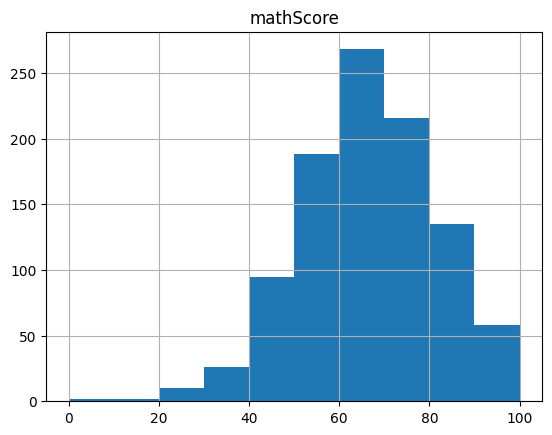

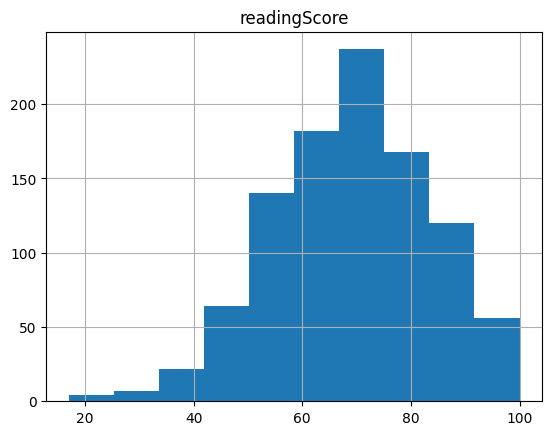

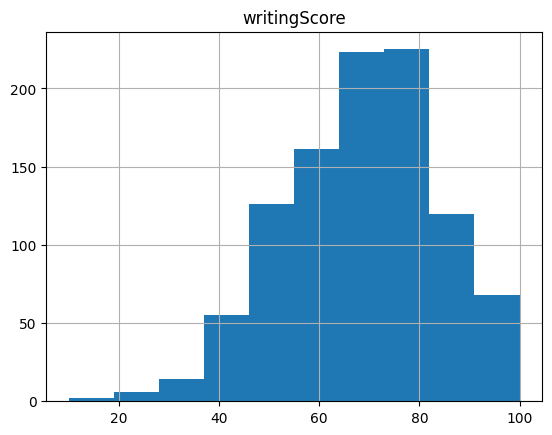

In [36]:
for c in num_cols:
    df.loc[:,[c]].hist()
    plt.show()

# Boxplot de las variables númericas

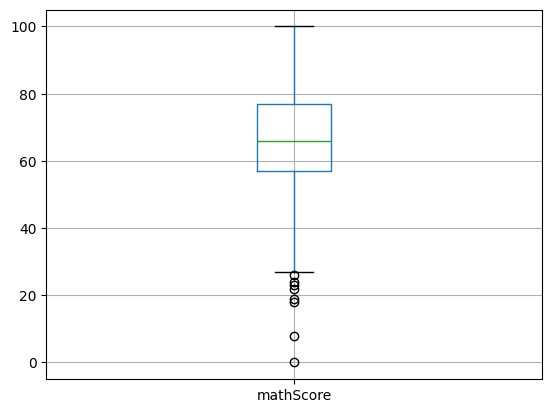

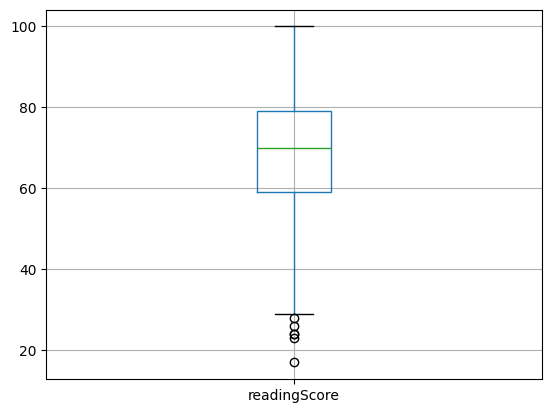

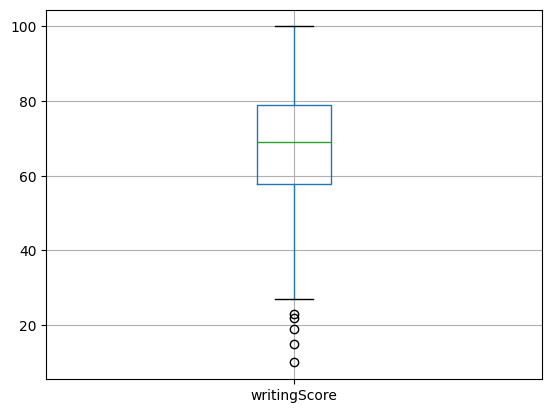

In [37]:
for c in num_cols:
    df.loc[:,[c]].boxplot()
    plt.show()

# Corte categorico #1

## Seleccion de columnas categorícas 'gender', 'race', 'testPreparation' con respecto a la columna númerica 'mathScore'

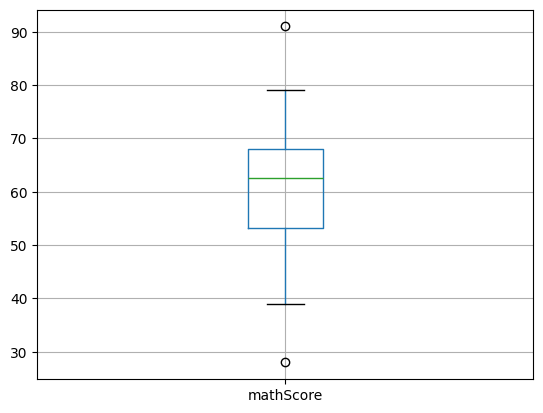

In [38]:
df.loc[(df["gender"]=='male')
       & (df["race"]=='group A')
       & (df['testPreparation']=='none'),["mathScore"]].boxplot()
plt.show()

# Corte categorico #2

## Seleccion de columnas categorícas 'gender', 'race', 'testPreparation' con respecto a la columna númerica 'mathScore'

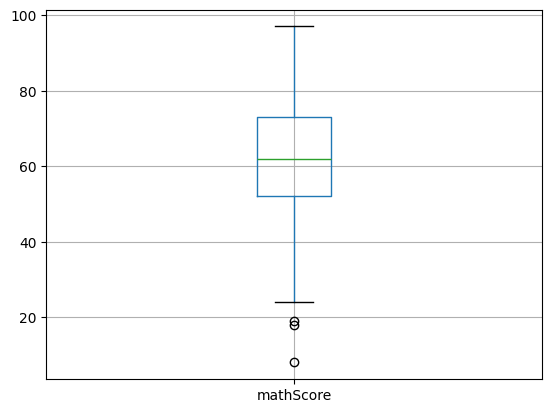

In [39]:
df.loc[(df["gender"]=='female')
       & (df["race"]=='group B')
       & (df['testPreparation']=='none'),["mathScore"]].boxplot()
plt.show()

In [40]:
transformations = {}
new_cols = []
for c in num_cols:
    transformations[c] = [
        ( 'lower_bound' , lambda x: x.quantile(.25) - 1.5*(x.quantile(.75) - x.quantile(.25))  ),
        ( 'upper_bound' , lambda x: x.quantile(.75) + 1.5*(x.quantile(.75) - x.quantile(.25))  )
    ]
    new_cols.append(f"{c}_lower_bound")
    new_cols.append(f"{c}_upper_bound")

In [41]:
df_resultados = df.groupby(cat_cols, as_index=False).agg(transformations)
df_resultados.columns = cat_cols + new_cols

df_resultados

,gender,race,lunch,testPreparation,mathScore_lower_bound,mathScore_upper_bound,readingScore_lower_bound,readingScore_upper_bound,writingScore_lower_bound,writingScore_upper_bound
0,female,group A,free/reduced,completed,11.250,97.250,19.000,99.000,17.500,105.500
1,female,group A,free/reduced,none,24.500,72.500,36.000,84.000,27.250,85.250
2,female,group A,standard,completed,45.500,97.500,67.000,99.000,53.500,113.500
3,female,group A,standard,none,36.000,76.000,38.000,94.000,50.500,86.500
4,female,group B,free/reduced,completed,28.000,92.000,45.000,101.000,38.500,106.500
5,female,group B,free/reduced,none,13.000,103.000,33.250,105.250,25.375,104.375
6,female,group B,standard,completed,42.500,84.500,50.875,101.875,43.000,111.000
7,female,group B,standard,none,28.500,100.500,31.750,113.750,33.750,107.750
8,female,group C,free/reduced,completed,25.250,91.250,46.250,100.250,45.750,103.750
9,female,group C,free/reduced,none,8.250,94.250,23.750,101.750,26.250,92.250


In [42]:
df_bound = df.merge(
    df_resultados,on=cat_cols,how="inner"
)

In [43]:
df_bound.loc[
    (df_bound["mathScore"] <= df_bound["mathScore_lower_bound"])
    |
    (df_bound["mathScore"] >= df_bound["mathScore_upper_bound"])
    ,
    cat_cols + ["mathScore","mathScore_lower_bound","mathScore_upper_bound"]
]

,gender,race,lunch,testPreparation,mathScore,mathScore_lower_bound,mathScore_upper_bound
6,female,group B,standard,completed,88,42.500,84.500
59,female,group C,free/reduced,none,0,8.250,94.250
76,male,group E,standard,none,30,42.375,111.375
91,male,group C,free/reduced,none,27,40.750,84.750
211,male,group C,free/reduced,none,35,40.750,84.750
288,male,group B,free/reduced,none,88,25.875,84.875
455,male,group C,free/reduced,none,37,40.750,84.750
474,female,group B,standard,completed,90,42.500,84.500
501,female,group B,standard,completed,94,42.500,84.500
571,male,group A,standard,none,91,39.750,85.750


In [44]:
df_bound.loc[
    (df_bound["mathScore"] > df_bound["mathScore_lower_bound"])
    &
    (df_bound["mathScore"] < df_bound["mathScore_upper_bound"])
    ,
    :
]

,gender,race,lunch,testPreparation,mathScore,readingScore,writingScore,mathScore_lower_bound,mathScore_upper_bound,readingScore_lower_bound,readingScore_upper_bound,writingScore_lower_bound,writingScore_upper_bound
0,female,group B,standard,none,72,72,74,28.500,100.500,31.750,113.750,33.750,107.750
1,female,group C,standard,completed,69,90,88,36.125,101.125,49.625,112.625,58.625,105.625
2,female,group B,standard,none,90,95,93,28.500,100.500,31.750,113.750,33.750,107.750
3,male,group A,free/reduced,none,47,57,44,19.000,95.000,8.250,110.250,12.000,96.000
4,male,group C,standard,none,76,78,75,33.750,103.750,28.250,102.250,22.250,100.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,standard,completed,88,99,95,45.500,113.500,54.000,110.000,49.000,121.000
996,male,group C,free/reduced,none,62,55,55,40.750,84.750,41.625,82.625,35.500,81.500
997,female,group C,free/reduced,completed,59,71,65,25.250,91.250,46.250,100.250,45.750,103.750
998,female,group D,standard,completed,68,78,77,45.500,99.500,60.750,98.750,57.875,110.875


In [45]:
df.loc[(df["gender"]=='male')
       & (df["race"]=='group A')
       & (df['testPreparation']=='none')
       & (df["lunch"]=='free/reduced'), :]

,gender,race,lunch,testPreparation,mathScore,readingScore,writingScore
3,male,group A,free/reduced,none,47,57,44
25,male,group A,free/reduced,none,73,74,72
61,male,group A,free/reduced,none,39,39,34
62,male,group A,free/reduced,none,62,61,55
228,male,group A,free/reduced,none,68,72,64
327,male,group A,free/reduced,none,28,23,19
395,male,group A,free/reduced,none,48,45,41
428,male,group A,free/reduced,none,65,59,53
444,male,group A,free/reduced,none,79,82,73
688,male,group A,free/reduced,none,53,58,44


In [46]:
def limpiarAtipicos(df,numericColumns):
    for c in numericColumns:
        print(df.shape[0])
        df = df.loc[ (df[c] > df[f"{c}_lower_bound"]) & (df[c] < df[f"{c}_upper_bound"]) , : ]

    return df
        

Antes de limpiar los valores atipicos de df_bound

In [47]:
df_bound.shape

(1000, 13)

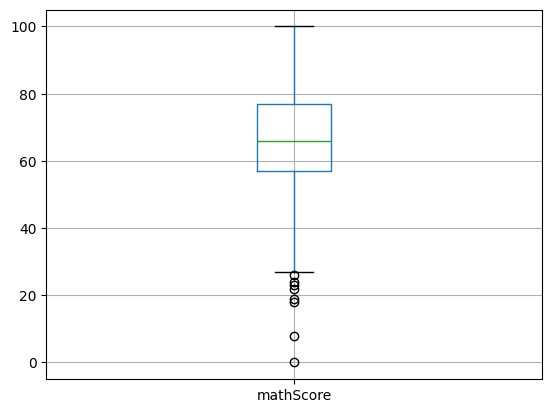

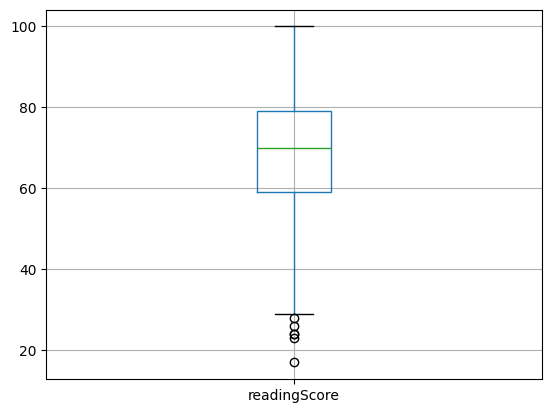

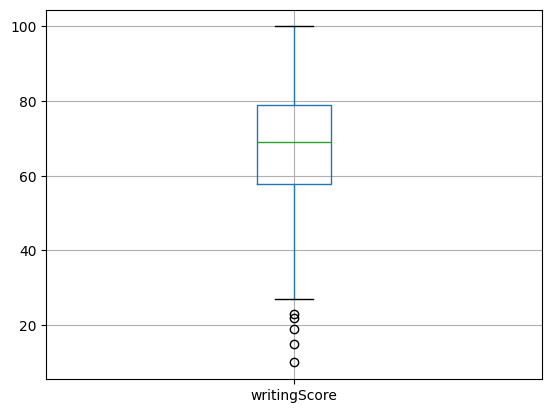

In [48]:
for c in num_cols:
    df_bound.loc[:,[c]].boxplot()
    plt.show()

Despues de limpiar los valores atipicos de df_bound

In [49]:
df_bound = limpiarAtipicos(df_bound, num_cols)

1000
982
969


In [50]:
df_bound.shape

(963, 13)

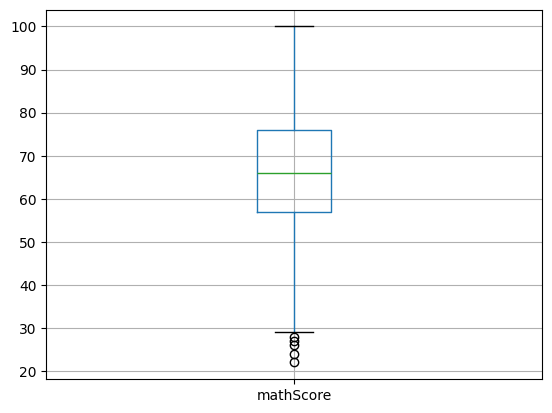

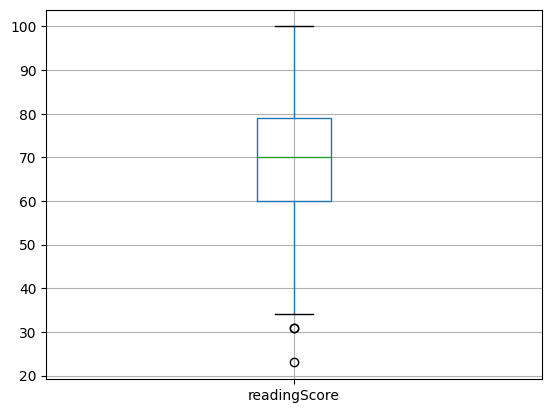

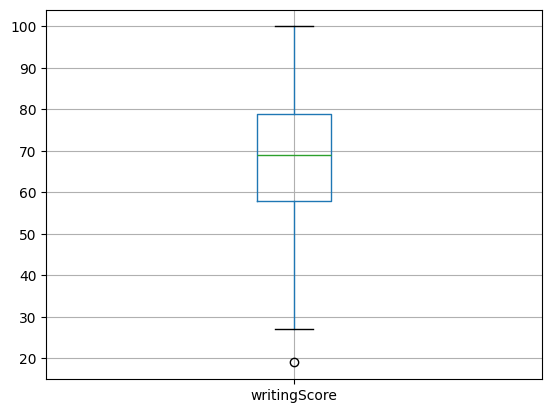

In [51]:
for c in num_cols:
    df_bound.loc[:,[c]].boxplot()
    plt.show()

In [53]:
1 - 963/1000

0.03700000000000003

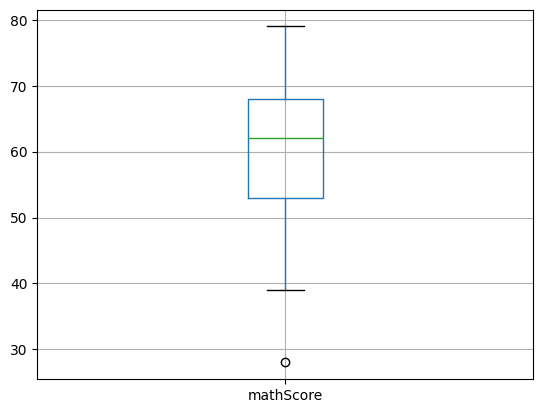

In [53]:
df_bound.loc[(df["gender"]=='male')
       & (df_bound["race"]=='group A')
       & (df_bound['testPreparation']=='none'),["mathScore"]].boxplot()
plt.show()

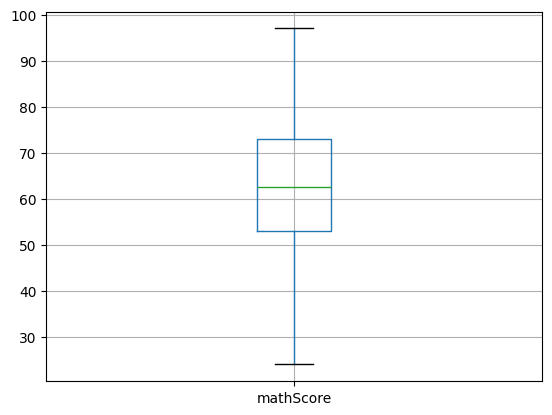

In [54]:
df_bound.loc[(df_bound["gender"]=='female')
       & (df_bound["race"]=='group B')
       & (df_bound['testPreparation']=='none'),["mathScore"]].boxplot()
plt.show()

In [55]:
df_clean = df_bound.loc[:,cat_cols+num_cols]

Resumenes Estadisticos

In [56]:
df_clean.groupby(
    cat_cols, as_index=False
).agg({
    'mathScore':["min","max","mean","std"]
})

gender     race         lunch testPreparation mathScore                  \
                                                        min  max       mean   
0   female  group A  free/reduced       completed        34   77  54.666667   
1   female  group A  free/reduced            none        37   61  47.000000   
2   female  group A      standard       completed        59   85  71.714286   
3   female  group A      standard            none        45   71  56.416667   
4   female  group B  free/reduced       completed        46   77  62.562500   
5   female  group B  free/reduced            none        24   78  57.700000   
6   female  group B      standard       completed        50   77  61.714286   
7   female  group B      standard            none        37   97  65.108696   
8   female  group C  free/reduced       completed        42   82  60.227273   
9   female  group C  free/reduced            none        22   77  50.578947   
10  female  group C      standard       completed        52   96  70.288889   
11  female  group C      standard            none        39   91  65.549296   
12  female  group D  free/reduced       completed        35   93  62.050000   
13  female  group D  free/reduced            none        26   79  55.451613   
14  female  group D      standard       completed        56   88  71.650000   
15  female  group D      standard            none        45   98  68.851852   
16  female  group E  free/reduced       completed        42   92  67.428571   
17  female  group E  free/reduced            none        32   81  58.625000   
18  female  group E      standard       completed        59   99  79.176471   
19  female  group E      standard            none        37  100  73.448276   
20    male  group A  free/reduced       completed        40   81  61.714286   
21    male  group A  free/reduced            none        28   79  57.133333   
22    male  group A      standard       completed        46  100  72.583333   
23    male  group A      standard            none        51   77  62.611111   
24    male  group B  free/reduced       completed        49   87  67.250000   
25    male  group B  free/reduced            none        40   75  56.157895   
26    male  group B      standard       completed        51   94  73.560000   
27    male  group B      standard            none        47   90  66.838710   
28    male  group C  free/reduced       completed        40   79  58.600000   
29    male  group C  free/reduced            none        49   80  64.178571   
30    male  group C      standard       completed        51   98  77.285714   
31    male  group C      standard            none        46   97  69.135593   
32    male  group D  free/reduced       completed        55   84  71.000000   
33    male  group D  free/reduced            none        42   90  63.064516   
34    male  group D      standard       completed        58   89  73.782609   
35    male  group D      standard            none        40   95  70.843750   
36    male  group E  free/reduced       completed        70   91  79.888889   
37    male  group E  free/reduced            none        46   93  69.600000   
38    male  group E      standard       completed        62   99  79.863636   
39    male  group E      standard            none        53   97  77.344828   

               
          std  
0   21.548395  
1    8.082904  
2    8.635475  
3    7.867752  
4   10.359979  
5   14.205633  
6    7.258190  
7   13.906399  
8   10.756756  
9   13.167592  
10  11.592753  
11  12.069784  
12  14.982358  
13  14.626092  
14   8.634539  
15  11.752812  
16  17.174178  
17  14.573378  
18  12.151313  
19  15.621840  
20  16.059413  
21  14.166695  
22  17.312415  
23   7.365571  
24  13.068501  
25  10.150332  
26  12.325718  
27  12.050164  
28  11.245584  
29   8.463663  
30  13.745995  
31  12.608779  
32   9.015139  
33  11.386938  
34   8.800602  
35  13.930917  
36   6.827233  
37  21.007142  
38  10.521160  
39  11.814869

In [57]:
summ_aggregations = {}
cols_summ = []
for c in num_cols:
    summ_aggregations[c] = ["min","max","mean","std"]
    cols_summ.append(f"{c}_min")
    cols_summ.append(f"{c}_max")
    cols_summ.append(f"{c}_mean")
    cols_summ.append(f"{c}_std")

In [58]:
df_summ = df_clean.groupby(
    cat_cols, as_index=False
).agg(summ_aggregations)

In [59]:
df_summ.columns = cat_cols + cols_summ

In [60]:
df_summ

,gender,race,lunch,testPreparation,mathScore_min,mathScore_max,mathScore_mean,mathScore_std,readingScore_min,readingScore_max,readingScore_mean,readingScore_std,writingScore_min,writingScore_max,writingScore_mean,writingScore_std
0,female,group A,free/reduced,completed,34,77,54.666667,21.548395,48,88,62.000000,22.538855,41,85,62.000000,22.068076
1,female,group A,free/reduced,none,37,61,47.000000,8.082904,43,73,58.400000,9.651713,43,73,55.400000,9.720540
2,female,group A,standard,completed,59,85,71.714286,8.635475,70,90,81.857143,6.517376,74,92,82.000000,7.000000
3,female,group A,standard,none,45,71,56.416667,7.867752,49,84,66.500000,10.850220,51,82,66.750000,8.225515
4,female,group B,free/reduced,completed,46,77,62.562500,10.359979,54,97,75.375000,12.467959,58,94,75.312500,10.737590
5,female,group B,free/reduced,none,24,78,57.700000,14.205633,38,87,69.550000,12.279529,27,87,66.500000,13.628530
6,female,group B,standard,completed,50,77,61.714286,7.258190,61,86,73.928571,7.858991,62,89,74.785714,8.040078
7,female,group B,standard,none,37,97,65.108696,13.906399,46,97,71.717391,13.631113,46,96,70.978261,12.492645
8,female,group C,free/reduced,completed,42,82,60.227273,10.756756,51,93,73.818182,9.776728,54,93,74.636364,10.069026
9,female,group C,free/reduced,none,22,77,50.578947,13.167592,39,90,62.736842,13.153325,33,91,59.921053,13.774990


### Expandir el Dataset

Obtencion de Distribuciones probabilisticas

In [61]:
prob_freq_clean = df_clean.groupby(cat_cols, as_index=False).agg({
    #Se utiliza el mathScore ya que el dataset no cuenta con un userID. 
    "mathScore": ["count"]
})

prob_freq_clean.columns = cat_cols + ["count"]

prob_freq_clean["freq"] = prob_freq_clean["count"] / df_clean.shape[0]

In [62]:
prob_freq_clean

,gender,race,lunch,testPreparation,count,freq
0,female,group A,free/reduced,completed,3,0.003115
1,female,group A,free/reduced,none,10,0.010384
2,female,group A,standard,completed,7,0.007269
3,female,group A,standard,none,12,0.012461
4,female,group B,free/reduced,completed,16,0.016615
5,female,group B,free/reduced,none,20,0.020768
6,female,group B,standard,completed,14,0.014538
7,female,group B,standard,none,46,0.047767
8,female,group C,free/reduced,completed,22,0.022845
9,female,group C,free/reduced,none,38,0.039460


In [63]:
cant_expnd = 100000

In [64]:
ids = np.random.choice(prob_freq_clean.index, size=cant_expnd, p=prob_freq_clean["freq"].to_list())

In [65]:
len(ids[ids==0])

311

In [66]:
len(ids)

100000

In [67]:
len(ids[ids==0])/len(ids)

0.00311

In [68]:
def trunc_vector(min_val, max_val, media, desv_std,size):
    a,b = (min_val - media) / desv_std, (max_val - media) / desv_std
    muestras = truncnorm.rvs(a,b,loc=media,scale=desv_std,size=size)

    return muestras

In [69]:
df_summ

,gender,race,lunch,testPreparation,mathScore_min,mathScore_max,mathScore_mean,mathScore_std,readingScore_min,readingScore_max,readingScore_mean,readingScore_std,writingScore_min,writingScore_max,writingScore_mean,writingScore_std
0,female,group A,free/reduced,completed,34,77,54.666667,21.548395,48,88,62.000000,22.538855,41,85,62.000000,22.068076
1,female,group A,free/reduced,none,37,61,47.000000,8.082904,43,73,58.400000,9.651713,43,73,55.400000,9.720540
2,female,group A,standard,completed,59,85,71.714286,8.635475,70,90,81.857143,6.517376,74,92,82.000000,7.000000
3,female,group A,standard,none,45,71,56.416667,7.867752,49,84,66.500000,10.850220,51,82,66.750000,8.225515
4,female,group B,free/reduced,completed,46,77,62.562500,10.359979,54,97,75.375000,12.467959,58,94,75.312500,10.737590
5,female,group B,free/reduced,none,24,78,57.700000,14.205633,38,87,69.550000,12.279529,27,87,66.500000,13.628530
6,female,group B,standard,completed,50,77,61.714286,7.258190,61,86,73.928571,7.858991,62,89,74.785714,8.040078
7,female,group B,standard,none,37,97,65.108696,13.906399,46,97,71.717391,13.631113,46,96,70.978261,12.492645
8,female,group C,free/reduced,completed,42,82,60.227273,10.756756,51,93,73.818182,9.776728,54,93,74.636364,10.069026
9,female,group C,free/reduced,none,22,77,50.578947,13.167592,39,90,62.736842,13.153325,33,91,59.921053,13.774990


In [70]:
df_extended = pd.DataFrame()

for i in prob_freq_clean.index:
    setting = {
        "id": ids[ids == i]
    }
    for c in num_cols:
        setting[c] = trunc_vector(
            df_summ.iloc[i][f"{c}_min"],
            df_summ.iloc[i][f"{c}_max"],
            df_summ.iloc[i][f"{c}_mean"],
            df_summ.iloc[i][f"{c}_std"],
            len(ids[ids==i])
        )
    
    tmp = pd.DataFrame(setting)
    df_extended = pd.concat([df_extended, tmp])

Dataset Limpio

In [71]:
df_clean.describe()

,mathScore,readingScore,writingScore
count,963.000000,963.000000,963.000000
mean,66.467290,69.510903,68.400831
std,14.169516,13.753119,14.336514
min,22.000000,23.000000,19.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,76.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


Dataset Extendido

In [72]:
df_extended.describe()

,id,mathScore,readingScore,writingScore
count,100000.00000,100000.000000,100000.000000,100000.000000
mean,20.36678,66.432893,69.284337,68.252847
std,11.00784,12.731777,12.317472,13.017200
min,0.00000,22.020773,23.009382,19.042701
25%,11.00000,57.858657,60.756881,59.079263
50%,19.00000,66.598261,69.666121,68.644494
75%,31.00000,75.303619,78.106357,77.795541
max,39.00000,99.974939,99.998661,99.994589


Dataset Original

In [73]:
df.describe()

,mathScore,readingScore,writingScore
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [74]:
prob_freq_clean["id"] = prob_freq_clean.index

In [75]:
prob_freq_clean.loc[:, ["id"] + cat_cols].merge(
    df_extended, on=["id"],how="inner"
)

,id,gender,race,lunch,testPreparation,mathScore,readingScore,writingScore
0,0,female,group A,free/reduced,completed,59.277971,49.152107,49.875434
1,0,female,group A,free/reduced,completed,56.011238,49.054799,65.396284
2,0,female,group A,free/reduced,completed,49.413582,62.328174,55.041467
3,0,female,group A,free/reduced,completed,67.480031,86.200377,59.604960
4,0,female,group A,free/reduced,completed,61.230407,67.057545,60.061690
...,...,...,...,...,...,...,...,...
99995,39,male,group E,standard,none,72.677473,63.144419,61.749018
99996,39,male,group E,standard,none,81.798975,62.778542,73.126340
99997,39,male,group E,standard,none,61.630180,63.442280,83.591183
99998,39,male,group E,standard,none,59.217512,60.565563,71.466942


# Boxplots DataSet original

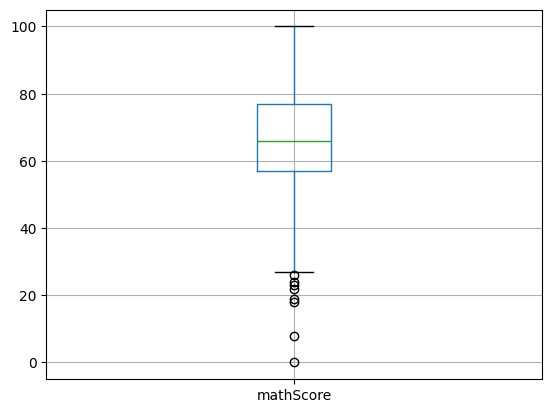

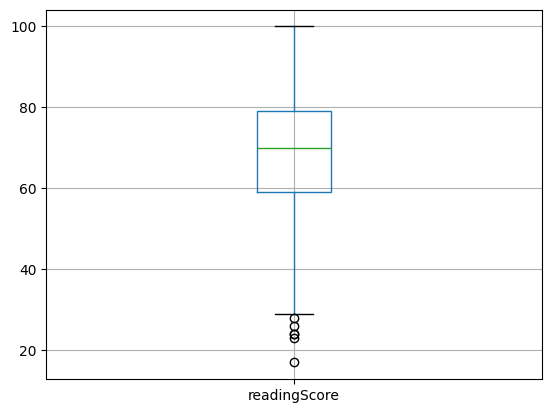

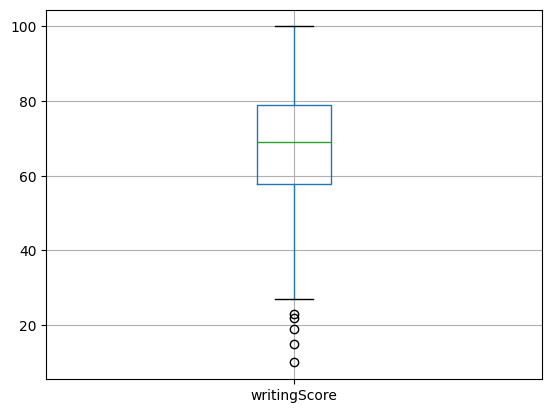

In [64]:
for c in num_cols:
    df.loc[:,[c]].boxplot()
    plt.show()

# Boxplots DataSet expandido

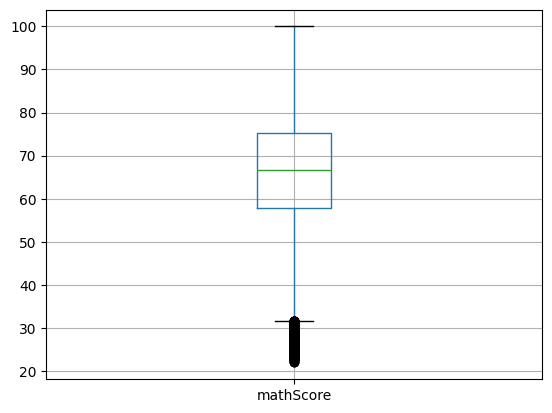

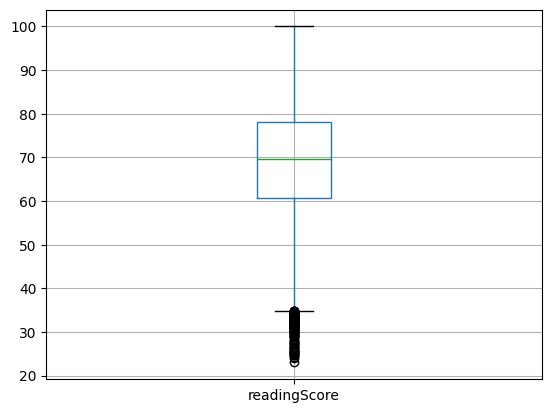

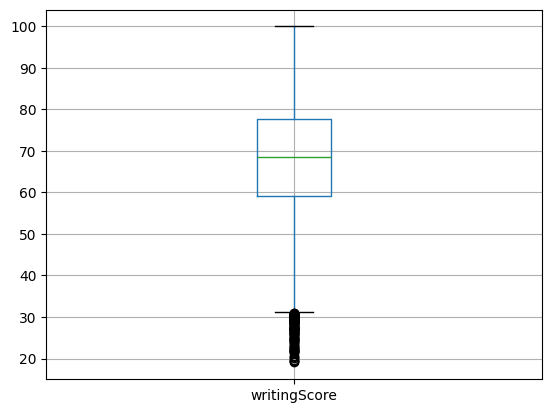

In [76]:
for c in num_cols:
    df_extended.loc[:,[c]].boxplot()
    plt.show()

# Distribución DataSet original

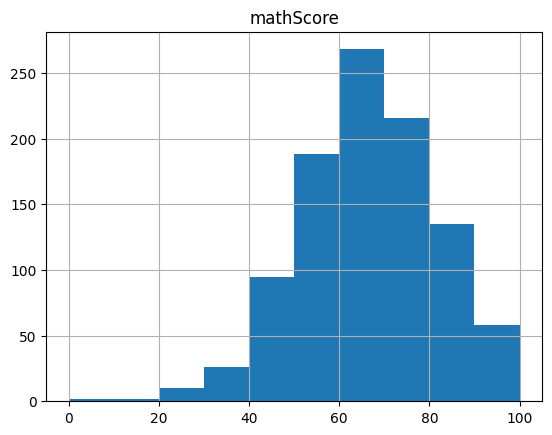

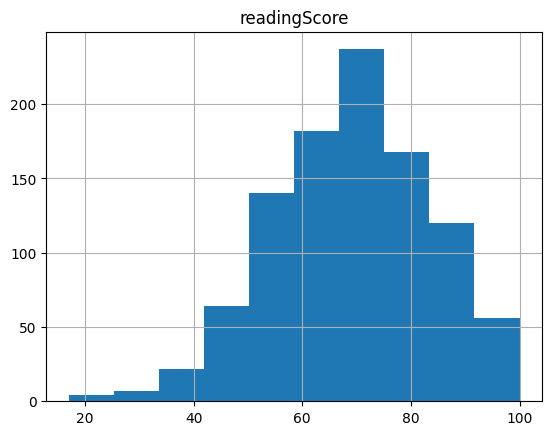

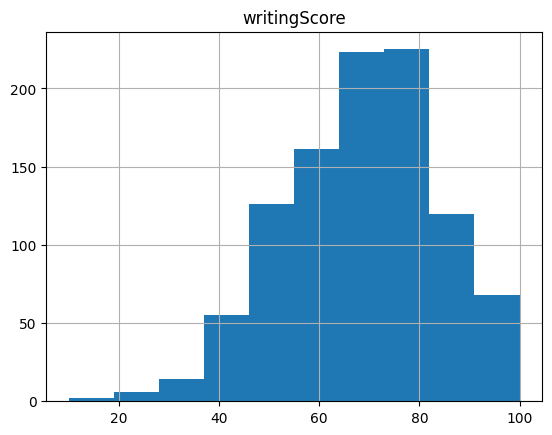

In [65]:
for c in num_cols:
    df.loc[:,[c]].hist()
    plt.show()

# Distribución DataFrame expandido

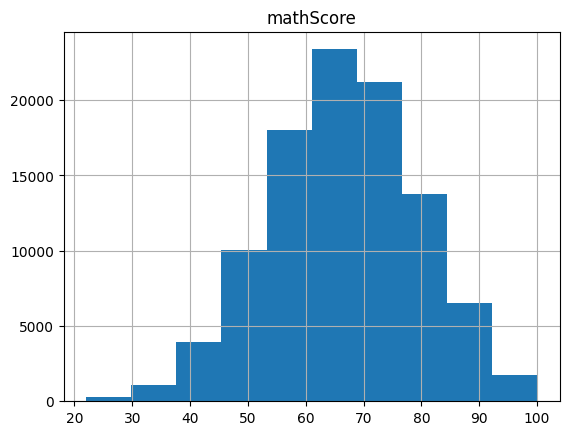

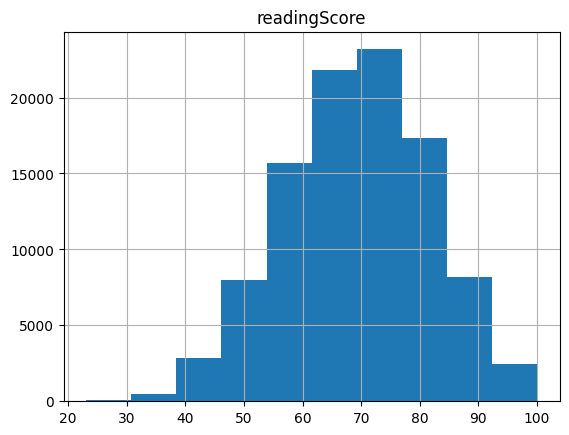

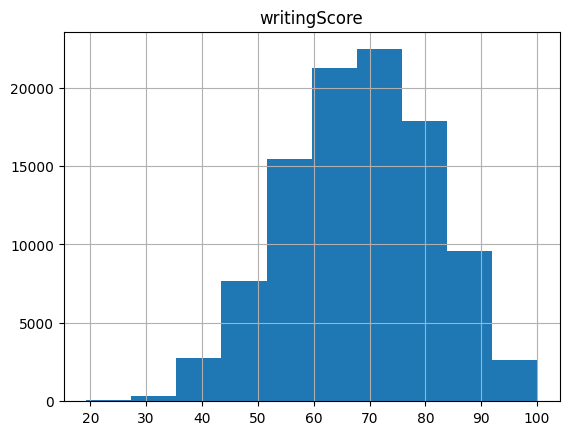

In [60]:
for c in num_cols:
    df_extended.loc[:,[c]].hist()
    plt.show()